# From Genomes to Traits: Reverse Ecology of Uncultivated Freshwater Actinobacteria

### Background and Preliminary Data

#### Trait-Based Ecology
Microbes are critical players in all ecosystems, where they support essential ecosystem functions. While microbes have tremendous influence on ecosystems, microbial ecologists do not have robust approaches to translate microbial-level observations to ecosystem-scale predictions. A better understanding of the microbial contribution to ecosystem behavior will enable more accurate predictions of ecosystem response to drivers such as climate change, as well as the impact these changes will have on ecosystem functions.

Trait-based approaches represent a promising approach for achieving such an understanding: their focus on the measurable properties of an organism (e.g., amino acid requirements, pH sensitivity) enables a mechanistic understanding of species-environment relationships. As a result, the application of trait-based approaches to microbial ecology has the potential to produce generalizable principles that elevate descriptive and correlative studies to a predictive level.

Bacterial communities in freshwater lakes are compelling model systems for which to develop a scaled-up understanding, as these bacteria drive the cycling of most biologically active elements in their ecosystems. In addition, existing heterogeneous datasets, laboratory experiments, and field observations contain a tremendous amount of information about the composition, dynamics, and environmental context of freshwater microbial communities. Of the freshwater bacteria, Actinobacteria are often the numerically dominant phylum, with phylotypes exhibiting contrasting dynamics through time. Nonetheless, the genetic basis underlying this niche partitioning remains unclear. As a result, the Actinobacteria represent a model phylum for linking genomic content to relevant microbial traits.

#### Preliminary Data
The McMahon laboratory has learned a tremendous amount about the ecology of freshwater lake bacteria in the past decade. They have developed a curated taxonomy for freshwater microbes, which uses a controlled nomenclature of phylum/lineage/clade/tribe to classify microbes based on 16S rRNA sequences. A total of 79 tribes have been identified, with the Actinobacteria comprising nine lineages, 14 clades, and 32 tribes. Some tribes seem to niche partition based on pH and water chemistry (associated with carbon source, terrestrial vs. aquatic).

The McMahon laboratory and collaborators have sequenced 46 single-cell amplified genomes (SAGs) from Lake Mendota and Trout Bog (Vilas County, WI). They have also sequenced 97 shotgun metagenomes from Lake Mendota, and 90 shotgun metagenomes from Trout Bog. More than 200 draft genomes have been assembled from the metagenomes (MAGs). These data are archived digitally with the public JGI-IMG platform and also through the NTL-LTER public database. Using phylogenetic analysis, **I have identified and classified a total of 60 genomes (SAGs+MAGs) belonging to members of the Actinobacteria: 25 SAGs and 35 MAGs.**

#### References
1. Green JL, Bohannan BJM, Whitaker RJ (2008) Microbial biogeography: from taxonomy to traits. Science 320: 1039–1043.
2. Levy R, Borenstein E (2012) Reverse Ecology: From Systems to Environments and Back. In: Soyer OS, editor. Advances in Experimental Medicine and Biology. Advances in Experimental Medicine and Biology. New York, NY: Springer New York, Vol. 751. pp. 329–345.
3. Newton RJ, Jones SE, Eiler A, McMahon KD, Bertilsson S (2011) A guide to the natural history of freshwater lake bacteria. Microbiol Mol Biol Rev 75: 14–49.

### Reverse Ecology

The term reverse ecology refer to a set of computational techniques which aim to infer the ecological traits of an organism directly from its metabolic network. The "flavor" of reverse ecology used in this work relies on the computation of two metabolic network properties, the "seed set" and the "expansion set." The seed set represents the minimal set of metabolites which must be exogenously acquired for growth. These are typically non-unique and can identify the range of nutrient sources used by an organism, as well as those substrates that can substitute for one another.  The expansion set represents the total set of metabolites an organism can synthesize given a set of exogenous metabolites. The two sets of compounds will reveal auxotrophies and biosynthetic capabilities that define metabolic phenotypes for each tribe. 

Furthermore, by comparing seed and expansion sets for each tribe, I can calculate a number of other metrics, including the environmental scope index (ESI) and the cohabitation score (CHS). ESI correlates with environmental flexibility (high ESI scores denote generalists and low scores denote specialists), while CHS measures the amount of competition a species could expect from other organisms. I will also compute the effective metabolic overlap (EMO) between each pair of tribes. The EMO measures the robustness of an organism to competition from other organisms, and EMO scores have been shown to positively correlate with inter-species competition and negatively correlate with growth rates. These metrics will illuminate each tribe’s ecological traits, such as niche (specialist vs. generalist) and robustness to competition.

### Graph Theory
Reverse ecology represents metabolic networks as graphs (a type of mathematical object). A graph consists of a set of objects (nodes) that are connected to one another (via edges). Graphs may be directed or undirected. In an undirected graph, a connection from A to B implies a connection from B to A. In a directed graph, edges point from A to B and not vice-versa. Metabolic networks are represented as directed graphs.

For the purposes of computation, graphs can be represented via a variety of data structures. In this work, graphs are represented as adjacency lists. The first column of the adjacency list gives the node, and the second column gives the nodes to which the first node points. The figure below shows a directed graph and its adjacency list representation.

![A graph and its adjacency list](files/imageFiles/RE-graphAdjList.png)

### Reverse Ecology Metrics

#### Seed Set
The fundamental "unit" of reverse ecology is a seed set. For a metabolic network, the seed is formally defined as "the minimal subset of the occurring compounds that cannot be synthesized from other compounds in the network (and hence are exogenously acquired) and whose existence permits the production of all other compounds in the network." For a metabolic network represented as a directed graph, the seed set is the minimal subset of nodes required to access every node in the network. In the directed graph below, nodes A and H represent a seed set of the network.

![Path from nodes A and H to all nodes](files/imageFiles/RE-graphSeedSetsAH.png)

Some seeds may be "equivalent:" that is, you can start from multiple seeds and reach the same nodes. In the graph shown above, the same nodes can be reached from starting nodes F, G, or H (shown below). In the absence of any other evidence, all three are equally likely to be a seed metabolite, so each of these compounds is assigned a weight of 1/3 (shown below).

![Path from nodes A and {F, G} to all nodes](files/imageFiles/RE-graphSeedSetsAFG.png)

Reference: Borenstein, E., & Feldman, M. W. (2009). Topological signatures of species interactions in metabolic networks. Journal of Computational Biology, 16(2), 191–200.

#### Metabolic Competition and Metabolic Complementarity

Metabolic competition represents the similarity in two organisms' nutritional profiles, and represents the potential for competition between the two organisms. The seed set of each organism's metabolic network is used as a proxy for its nutritional profile. For two organisms A and B, the metabolic competition index is calculated as the fraction of compounds in A's seed set that are also present in B's seed set. Because individual seed compounds have weights assigned to them, the fraction is calculated as a normalized weighted sum. This index provides an upper bound for the amount of competition species A could encounter from species B.

Metabolic complementarity represents the complementarity in two organisms’ nutritional profiles, and represents the potential for syntrophy between A and B. Again, the seed set of each organism's metabolic network is used as a proxy for its nutritional profile. For two organisms A and B, the metabolic complementarity index is calculated as the fraction of compounds in A's seed set that are present in B's metabolic network, _but are not a part of B's seed set_ (e.g, B's 'non-seed' compounds). This index provides an upper bound for the potential for syntrophic interactions between A and B.

Note that neither of these indices are symmetric.

The figure below illustrates metabolic competition and metabolic complementarity.

![Illustration of metabolic competition and metabolic complementarity](files/imageFiles/RE-CoopComp.png)

Each panel shows the metabolic networks of two organisms represented as a directed graph. The shaped nodes represent exogenously acquired metabolites (seeds). **(A)** Metabolic competition. The brackets indicate the four and five seed nutrients exogenously acquired by the ellipse- and rectangle-shaped organisms, respectively. The two metabolites enclosed in a dashed rectangle are shared nutrients for which the organisms may compete. The metabolic competition index for the first organism in the presence of the second is 2/4, while the index of the second organism in the presence of the second is 2/4, whereas the competition index of the second species in the presence of the first is 2/5. **(B)** Metabolic complementarity. The compounds enclosed in a dashed rectangle denote nutrients required by the second organism that can be synthesized by the first organism. The metabolic complementarity index for the second species in the presence of the first is 3/5.

Reference: Levy, R., & Borenstein, E. (2013). Metabolic modeling of species interaction in the human microbiome elucidates community-level assembly rules. Proceedings of the National Academy of Sciences, 110(31), 12804–12809.

#### References - Metabolic Networks and Graph Theory
1. Jeong, H., Tombor, B., Albert, R., Oltvai, Z. N., & Barabási, A.-L. (2000). The large-scale organization of metabolic networks. Nature, 407(6804), 651–654.
2. Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to Algorithms (3rd ed.). MIT Press.

#### References - Reverse Ecology
1. Borenstein, E., & Feldman, M. W. (2009). Topological signatures of species interactions in metabolic networks. Journal of Computational Biology, 16(2), 191–200.
2. Borenstein, E., Kupiec, M., Feldman, M. W., & Ruppin, E. (2008). Large-scale reconstruction and phylogenetic analysis of metabolic environments. Proceedings of the National Academy of Sciences, 105(38), 14482–14487.
3. Carr, R., & Borenstein, E. (2012). NetSeed: a network-based reverse-ecology tool for calculating the metabolic interface of an organism with its environment. Bioinformatics, 28(5), 734–735.
4. Ebenhöh, O., Handorf, T., & Heinrich, R. (2004). Structural analysis of expanding metabolic networks. Genome Informatics, 15(1), 35–45.
5. Freilich, S., Kreimer, A., Borenstein, E., Yosef, N., Sharan, R., Gophna, U., & Ruppin, E. (2009). Metabolic-network-driven analysis of bacterial ecological strategies. Genome Biology, 10(6), R61.
6. Freilich, S., Kreimer, A., Meilijson, I., Gophna, U., Sharan, R., & Ruppin, E. (2010). The large-scale organization of the bacterial network of ecological co-occurrence interactions. Nucleic Acids Research, 38(12), 3857–3868.
7. Handorf, T., Ebenhöh, O., & Heinrich, R. (2005). Expanding metabolic networks: Scopes of compounds, robustness, and evolution. Journal of Molecular Evolution, 61(4), 498–512.
8. Kreimer, A., Dorrestein, P. C., Borenstein, E., & Freilich, S. (2012). NetCmpt: a network-based tool for calculating the metabolic competition between bacterial species. Bioinformatics, 28(16), 2195–2197.
9. Levy, R., & Borenstein, E. (2012). Reverse Ecology: From Systems to Environments and Back. In O. S. Soyer (Ed.), Advances in Experimental Medicine and Biology (Vol. 751, pp. 329–345). New York, NY: Springer New York.
10. Levy, R., & Borenstein, E. (2013). Metabolic modeling of species interaction in the human microbiome elucidates community-level assembly rules. Proceedings of the National Academy of Sciences, 110(31), 12804–12809.

### Phylogenetic Reconstruction

Maximum-likelihood estimation was used to build a phylogenetic tree of 60 SAGs and MAGs in the phylum Actinobacteria. I also included 12 other FW actino genomes. The tree was constructed using RAxML using concatenated alignments of 37 marker genes (from Phylosift). 

The following genomes were excluded from the tree:  
* AAA027F04 and AAA028C09 - these genomes lack all of the marker genes and do not classify
* TBhypo3815 - clusters as an outgroup to the rest of the Actinobacteria
* AAA027D23, AAA028N15, acAMD-2, acAMD-5, and MEint6647 - these five genomes contribute to poor bootstrap values at some nodes. In some trees, all five genomes cluster together, while in other trees they form two phylogentically distinct clusters: (acAMD-2, acAMD-5) and (AAA027D23, AAA028N15, MEint6647). Sarah also suspects AAA028N15 is contaminated. Removing these samples significantly improves bootstrap values.
* acAcidI - this MAG contributes to poor bootstrap values. The MAG is thought to contain two genomes from two separate populations. Removing these samples significantly improves bootstrap values.

**The final tree contains 63 FW Actinobacterial genomes.**

Organisms were classified using a "guilt by association" approach, in which MAGs were assumed to belong the same lineage/clade/tribe/ as a SAG if they share a parent node w/ that SAG. Some genomes, such as the 'Myco' MAG, were classified on the basis of taxonomy. I also developed an approach for classifying genomes which relies on ANI and coverage. The final tree is shown below:

![Phylogenetic Tree](imageFiles/2015-08-21-FinalTree.png)

Here are the same data in table form:

| Short name     | Lineage | Clade   | Tribe    | Justification                     | 
|----------------|---------|---------|----------|-----------------------------------| 
| AAA023D18      | acI     | acI-B   | acI-B1   | 16S                               | 
| AAA023J06      | acI     | acI-A   | acI-A7   | 16S                               | 
| AAA024D14      | acI     | acI-A   | acI-A7   | 16S                               | 
| AAA027E14      | acIV    | acIV-A  | Iluma-A2 | 16S                               | 
| AAA027J17      | acI     | acI-B   | acI-B1   | 16S                               | 
| AAA027L06      | acI     | acI-B   | acI-B1   | 16S                               | 
| AAA027L17      | acIV    | acIV-B  | Iluma-B1 | 16S                               | 
| AAA027M14      | acI     | acI-A   | acI-A1   | 16S                               | 
| AAA028A23      | acI     | acI-B   | acI-B1   | 16S                               | 
| AAA028E20      | acI     | acI-A   | acI-A6   | 16S                               | 
| AAA028G02      | acI     | acI-A   | acI-A5   | 16S                               | 
| AAA028I14      | acI     | acI-A   | acI-A6   | 16S                               | 
| AAA028K15      | acIV    | acIV-B  | Iluma-B2 | 16S                               | 
| AAA028P02      | Luna1   | Luna1-A | Luna1-A2 | 16S                               | 
| AAA041L13      | acI     | acI-A   | acI-A7   | 16S                               | 
| AAA044D11      | acI     | acI-B   | acI-B4   | 16S                               | 
| AAA044N04      | acI     | acI-A   | acI-A7   | 16S                               | 
| AAA044O16      | acI     | acI-A   | acI-A5   | 16S                               | 
| AAA278I18      | acI     | acI-B   | acI-B1   | 16S                               | 
| AAA278O22      | acI     | acI-A   | acI-A1   | 16S                               | 
| AB141P03       | acI     | acI-B   | acI-B1   | 16S                               | 
| acIB-AMD-6     | acI     | acI-B   | acI-B1   | Clustering                        | 
| acIB-AMD-7     | acI     | acI-B   | acI-B1   | Clustering                        | 
| acMicro-1      | acMicro | Unknown | Unknown  | New group                         | 
| acMicro-4      | acMicro | Unknown | Unknown  | New group                         | 
| bin_10         | acI     | acI-C   | Unknown  | Clustering                        | 
| bin_15         | acIV    | Unknown | Unknown  | Clustering                        | 
| bin_29_2_acIII | acIII   | Unknown | Unknown  | 16S                               | 
| bin_7_acI-B2   | acI     | acI-B   | acI-B2   | 16S                               | 
| MEint10152     | acTH2   | acTH2-A | Myco     | Taxonomy                          | 
| MEint1091      | acIV    | acIV-B  | Unknown  | Taxonomy, Clustering              | 
| MEint11576     | acIV    | Unknown | Unknown  | Taxonomy, Clustering              | 
| MEint1363      | acI     | acI-A   | Unknown  | Clustering                        | 
| MEint14260     | acIV    | Unknown | Unknown  | Taxonomy, Clustering              | 
| MEint1719      | acIV    | acIV-B  | Iluma-B1 | Taxonomy, Clustering, ANI and COV | 
| MEint1953      | acIV    | Unknown | Unknown  | Taxonomy, Clustering              | 
| MEint2297      | acI     | acI-A   | Unknown  | Clustering                        | 
| MEint2538      | Luna1   | Luna1-A | Luna1-A2 | Clustering                        | 
| MEint2729      | acIV    | acIV-B  | Iluma-B2 | Taxonomy, Clustering, ANI and COV | 
| MEint283       | acI     | acI-B   | acI-B1   | Clustering                        | 
| MEint3119      | Unknown | Unknown | Unknown  | Unknown                           | 
| MEint3163      | acIV    | Unknown | Unknown  | Taxonomy, Clustering              | 
| MEint3864      | acI     | acI-C   | Unknown  | Clustering                        | 
| MEint4252      | acI     | acI-B   | acI-B4   | Clustering, ANI and COV           | 
| MEint885       | acI     | acI-C   | Unknown  | Clustering                        | 
| Rhodoluna      | Luna1   | Luna1-A | Luna1-A2 | 16S                               | 
| TBepi149       | acV     | Unknown | Unknown  | Taxonomy, Clustering              | 
| TBepi2057      | acI     | acI-B   | Unknown  | Clustering                        | 
| TBepi2754      | acI     | acI-B   | Unknown  | Clustering                        | 
| TBepi2973      | acV     | Unknown | Unknown  | Taxonomy, Clustering              | 
| TBepi3207      | acI     | acI-B   | Unknown  | Clustering                        | 
| TBepi3256      | acV     | Unknown | Unknown  | Taxonomy, Clustering              | 
| TBepi3475      | acI     | acI-B   | Unknown  | Clustering                        | 
| TBepi4163      | acV     | Unknown | Unknown  | Taxonomy, Clustering              | 
| TBepi4208      | acI     | acI-B   | Unknown  | Clustering                        | 
| TBhypo2152     | acI     | acI-B   | Unknown  | Clustering                        | 
| TBhypo3180     | acV     | Unknown | Unknown  | Taxonomy, Clustering              | 
| TBhypo3219     | acV     | Unknown | Unknown  | Taxonomy, Clustering              | 
| TBhypo3463     | acI     | acI-B   | Unknown  | Clustering                        | 
| TBhypo3765     | acV     | Unknown | Unknown  | Taxonomy, Clustering              | 
| TBhypo3838     | acI     | acI-B   | Unknown  | Clustering                        | 
| TBhypo680      | acI     | acI-B   | Unknown  | Clustering                        | 
| TBhypo9906     | acV     | Unknown | Unknown  | Taxonomy, Clustering              | 


| Too Small to Cluster | Lineage | Clade   | Tribe    | Justification        | 
|----------------------|---------|---------|----------|----------------------| 
| AAA027F04            | acTH1   | acTH1-A | acTH1-A1 | 16S                  | 
| AAA028C09            | Luna1   | Luna1-A | Luna1-A4 | 16S                  | 

| Cluster Poorly | Lineage | Clade   | Tribe    | Justification | 
|----------------|---------|---------|----------|---------------| 
| AAA027D23      | acSTL   | acSTL-A | acSTL-A1 | 16S           | 
| AAA028N15      | acTH1   | acTH1-A | acTH1-A1 | 16S           | 
| acAcidi        | acIV    | Unknown | Unknown  | Taxonomy      | 
| acAMD-2        | acTH1   | Unknown | Unknown  | Taxonomy      | 
| acAMD-5        | acTH1   | Unknown | Unknown  | Taxonomy      | 
| MEint6647      | Unknown | Unknown | Unknown  |               | 
| TBhypo3815     | Unknown | Unknown | Unknown  |               | 

Based on the above taxonomy, we can count samples from each lineage, clade and tribe:

| Lineage | Count |  | Clade   | Count |  | Tribe    | Count | 
|---------|-------|--|---------|-------|--|----------|-------| 
| acI     | 36    |  | acI-A   | 12    |  | acI-A1   | 2     | 
| acIII   | 1     |  | acI-B   | 21    |  | acI-A5   | 2     | 
| acIV    | 11    |  | acI-C   | 3     |  | acI-A6   | 2     | 
| acMicro | 2     |  | acIV-A  | 1     |  | acI-A7   | 4     | 
| acTH2   | 1     |  | acIV-B  | 5     |  | acI-B1   | 9     | 
| acV     | 8     |  | acTH2-A | 1     |  | acI-B2   | 1     | 
| Luna1   | 3     |  | Luna1-A | 3     |  | acI-B4   | 2     | 
| Unknown | 1     |  | Unknown | 17    |  | Iluma-A2 | 1     | 
|         |       |  |         |       |  | Iluma-B1 | 2     | 
|         |       |  |         |       |  | Iluma-B2 | 2     | 
|         |       |  |         |       |  | Luna1-A2 | 3     | 
|         |       |  |         |       |  | Myco     | 1     | 
|         |       |  |         |       |  | Unknown  | 32    | 

#### References
1. Stamatakis A (2014) RAxML version 8: a tool for phylogenetic analysis and post-analysis of large phylogenies. Bioinformatics 30: 1312–1313.
2. Darling, A. E., Jospin, G., Lowe, E., Matsen, F. A., Bik, H. M., & Eisen, J. A. (2014). PhyloSift: phylogenetic analysis of genomes and metagenomes. PeerJ, 2, e243.
3. Garcia, S. L., McMahon, K. D., Martinez-Garcia, M., Srivastava, A., Sczyrba, A., Stepanauskas, R., … Warnecke, F. (2013). Metabolic potential of a single cell belonging to one of the most abundant lineages in freshwater bacterioplankton. The ISME Journal, 7(1), 137–147.
4. Garcia, S. L., McMahon, K. D., Grossart, H.-P., & Warnecke, F. (2014). Successful enrichment of the ubiquitous freshwater acI Actinobacteria. Environmental Microbiology Reports, 6(1), 21–27.
5. Ghylin, T. W., Garcia, S. L., Moya, F., Oyserman, B. O., Schwientek, P., Forest, K. T., … McMahon, K. D. (2014). Comparative single-cell genomics reveals potential ecological niches for the freshwater acI Actinobacteria lineage. The ISME Journal, 8(12), 2503–2516.
6. Ghai, R., Mizuno, C. M., Picazo, A., Camacho, A., & Rodriguez-Valera, F. (2014). Key roles for freshwater Actinobacteria revealed by deep metagenomic sequencing. Molecular Ecology, 23(24), 6073–6090.
7. Tsementzi, D., Poretsky, R., Rodriguez-R, L. M., Luo, C., & Konstantinidis, K. T. (2014). Evaluation of metatranscriptomic protocols and application to the study of freshwater microbial communities. Environmental Microbiology Reports, 6(6), 640–655.

### Genome Statistics

Genome metadata were downloaded from IMG and processed using Microsoft Excel. Genome completeness was estimated based on presence/absence of 204 Actinobacterial marker genes as identified by CheckM.

![Genome metadata](files/imageFiles/2015-08-19-Metadata.png)

#### References
1. Parks, D. H., Imelfort, M., Skennerton, C. T., Hugenholtz, P., & Tyson, G. W. (2015). CheckM: assessing the quality of microbial genomes recovered from isolates, single cells, and metagenomes. Genome Research, 25(7), 1043–1055.

#### References
1. Thiele I, Palsson BØ (2010) A protocol for generating a high-quality genome-scale metabolic reconstruction. Nat Protoc 5: 93–121.
2. Aziz RK, Bartels D, Best AA, DeJongh M, Disz T, et al. (2008) The RAST Server: rapid annotations using subsystems technology. BMC Genomics 9: 75.
3. Henry CS, DeJongh M, Best AA, Frybarger PM, Linsay B, et al. (2010) High-throughput generation, optimization and analysis of genome-scale metabolic models. Nat Biotechnol 28: 977–982.

### An Aside: Notes on My Python Workflow
I am developing a workflow in Python to carry out reverse ecology analysis. Major pieces of analysis have been written as functions, which I will import into this iPython notebook. Each section of analysis and discussion will include the relevant function calls.

This first section imports the functions I've developed and establishes the directory structure for storing the data. It also creates a list of metabolic network models for processing (dirList). (This is necessary for the next steps.)

In [1]:
# Import special features for iPython
import sys
sys.path.append('../Python')
import matplotlib
%matplotlib inline

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
import graphFunctions as gf
import metadataFunctions as mf
import sbmlFunctions as sf
import seedFunctions as ef

cobra/io/sbml3.py:21 UserWarning: Install lxml for faster SBML I/O


### From Genomes to Network Reconstructions

#### Converting KBase SBML files to Graphs

The first step in reverse ecology analysis is to convert the SBML representation of the metabolic network to a graph. The network is represented as a directed graph, where nodes denote and compounds and edges denote reactions. A directed edge from A to B indicates that compound A is a substrate in a reaction which produces compound B. That is, for a given reaction, all the nodes that represent its substrates are connected by directed edges to all the nodes that represent its products.

The figure below gives stoichiometry for two reactions and shows the resulting directed graph.

![Converting reaction stoichiometry to a network graph](files/imageFiles/RE-StoichToGraph.png)

The code below converts the SBML representations to metabolic network graphs.

In [2]:
# Define local folder structure for data input and processing.
externalDataDir = 'ExternalData'
processedDataDir = 'ProcessedModelFiles'
rawModelDir = 'RawModelFiles'
summaryStatsDir = 'DataSummaries'

# Import the list of models
dirList = mf.getDirList('../'+rawModelDir)
numSubDir = len(dirList)

modelStatArray = sf.dirListToAdjacencyList(dirList, externalDataDir, processedDataDir, summaryStatsDir)

Converting SBML files to adjacency lists


#### Merging Network Graphs Belonging to the Same Tribe

Preliminary evidence (not shown) suggested that reverse ecology analysis is sensitive to genome incompleteness. To overcome this issue, we decided to merge metabolic models of all those genomes belonging to a particular tribe.

The process is illustrated in the figure below. For each tribe, I start with a single genome from that tribe (e.g., 'Graph A' in the figure). For the next genome from that tribe ('Graph B' in the figure), unique metabolic pathways are identified (green nodes and their arcs). Those unique pathways are appended to the original graph, giving a metabolic network graph which contains the content of both genomes ('Union of A and B' in the figure). The process is repeated, with unique metabolic pathways being appended to the 'Union' graph.

![Procedure for genome merging](imageFiles/genomeMerging.png)

Reverse ecology analysis will then be performed on these merged models.

The code below creates the necessary folder structure. Then, I read in the taxonomy {lineage, clade, tribe} for each genomes and aggregates all genomes belonging to the same tribe.

In [3]:
# Define local folder structure for data input and processing.
genomeModelDir = 'ProcessedModelFiles'
mergedModelDir = 'MergedData'

In [4]:
tribeSampleDict =  mf.importTaxonomy('../ExternalData/taxonomy.csv', 'Tribe')
gf.createMergedGraph(tribeSampleDict, mergedModelDir, genomeModelDir)

cladeSampleDict =  mf.importTaxonomy('../ExternalData/taxonomy.csv', 'Clade')
gf.createMergedGraph(cladeSampleDict, mergedModelDir, genomeModelDir)

lineageSampleDict =  mf.importTaxonomy('../ExternalData/taxonomy.csv', 'Lineage')
gf.createMergedGraph(lineageSampleDict, mergedModelDir, genomeModelDir)

Importing taxonomy
Merging genomes from specified taxonomic groups (lineage/clade/group)
Importing taxonomy
Merging genomes from specified taxonomic groups (lineage/clade/group)
Importing taxonomy
Merging genomes from specified taxonomic groups (lineage/clade/group)


### Reverse Ecology Using Python

#### Analyze Graph Representations

In graph theory, a connected component of a graph is a subgraph in which all pairs of vertices are connected to each other by paths, and which has no connections to nodes outside the subgraph. The graph below has four connected components, each in a different color.

![Four connected components](files/imageFiles/RE-graphComponents.png)

A graph which has only a single component is fully connected. The graphs algorithms used in reverse ecology analysis require the metabolic network contain a single, fully connected graph. 

Oftentimes metabolic network graphs contain multiple components, so it's important to check the assumption of fully connectedness for our graphs. If the graphs are not fully connected, we have to decide what to do. Common choices are:
1. Discard all but the largest component.
2. Combine metabolic network graphs from closely-related organisms (tribes, in our case) and check that the new/larger graph is now connected.

The code below computes the connected components of our metabolic network graphs and makes a histogram.

Computing graph statistics


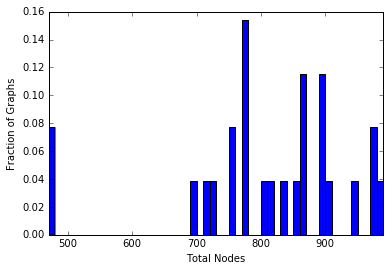

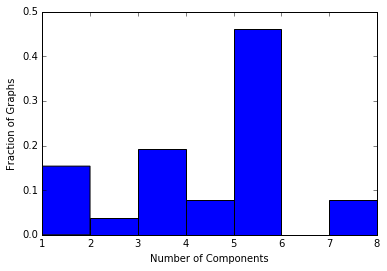

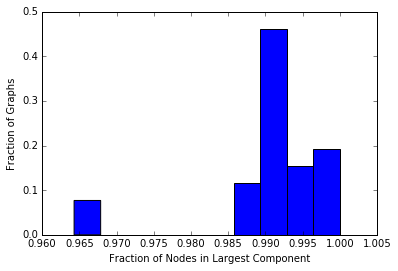

In [5]:
# Define local folder structure for data input and processing.
mergedModelDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'

# Import the list of models
dirList = mf.getDirList('../'+mergedModelDir)
numSubDir = len(dirList)

graphStatArray, diGraphStatArray = gf.computeGraphStats(dirList, mergedModelDir, summaryStatsDir)
gf.plotGraphStats(graphStatArray)

#### Reducing Graphs to Their Largest Component

Cool! The third histogram shows that the largest component of each graph contains at least 96% of the metabolites (nodes) in the graph. We don't need to consolidate our graphs and can analyze in each individually. The following code section reduces each graph to its largest connected component.

In [6]:
# Define local folder structure for data input and processing.
mergedModelDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'

# Import the list of models
dirList = mf.getDirList('../'+mergedModelDir)
numSubDir = len(dirList)

reducedGraphStatArray = gf.reduceToLargeComponent(dirList, mergedModelDir, summaryStatsDir)

Reducing to largest component


#### Computation of Seed Sets

Recall the definition of a seed set: the set of compounds that, based on metabolic network topology, are exogenously acquired for growth. Formally, the seed set of a network is the minimal subset of compounds (nodes) that cannot be synthesized from other compounds in the network, and whose presence in the environment permits the production of all other compounds in the network. In other words, the seed set of a network is a set of nodes from which all other nodes can be reached.

The seed set detection algorithm decomposes the metabolic network into its strongly connected components. This decomposition enables the seed set detection problem to be reduced to the problem of detecting source components in the condensation of the original network. What on earth does that mean?

A strongly connected component (SCC) of a directed graph is a subgraph such that every vertex is reachable from every other vertex. By definition, a vertex is automatically reachable from itself, so an SCC can contain only a singoe component. Consider the network below. The three SCCs of this graph are indicated with different colors. 

![Strongly connected components](files/imageFiles/RE-graphSCCs.png)

Let's take a closer look at the orange component. For each vertex, the figure below shows the paths by which the other three vertices can be reached.

![Paths through an SCC](files/imageFiles/RE-graphSCCPaths.png)

To generate the condensation of a graph, each SCC is contracted to a single vertex. The figure below shows condensation of the above graph (nodes A to H). Then, source components (nodes with no incoming edges) are identified. Such components are circled in purple. Starting from these nodes, paths can be drawn to fully connect the condensed graph.

![Condensation of a graph](files/imageFiles/RE-graphCondensation.png)

To find the seed sets, each source component in the condensation is then expanded to its original nodes. Because each vertex of the condensation is an SCC of the original graph, each vertex of the condensation contains a set of "equivalent nodes", meaning that each node can be reached from the others. Thus, the original graph has two seed sets, one containing compound A, and the other containing compounds F, G, and H. The figure below shows how all nodes can be reached starting from nodes A and H.

![Path from seed nodes to all nodes](files/imageFiles/RE-graphSeedSets.png)

Thus, the seed set detection algorithm contains four steps.
1. Identify the SCCs of the (directed) network graph
2. Use the SCCs to derive the condensation of the original graph
3. Identify source components in the condensation
4. Expand each source component of the condensation into its original node

Seed compounds can also have weights associated with them. For a seed compound belonging to a source component of size n, its weight is 1/n. Thus, in the example above, the seed compound 'A' has a weight of 1, and the compounds {F, G, H} each have weight 1/3.

The code below performs the four steps shown above for the metabolic network graph of each genome. The seed compounds for each graph are written to a file, with each line in the file containing a set of equivalent seed compounds. The code also plots histograms of the number and size of the seed sets against network size.

Computing seed sets


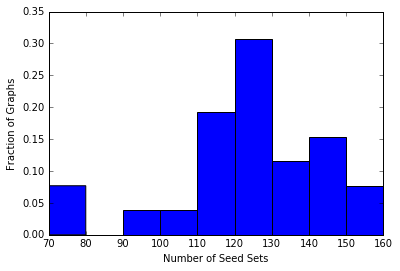

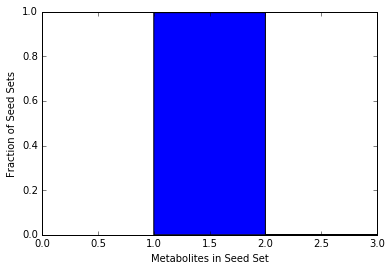

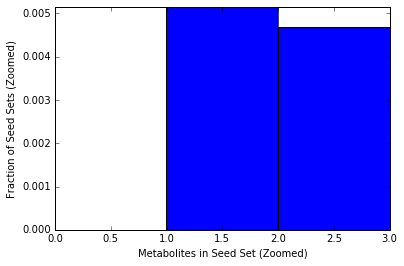

In [7]:
# Define local folder structure for data input and processing.
externalDataDir = 'externalData'
mergedModelDir = 'MergedData'

# Import the list of models
dirList = mf.getDirList('../'+mergedModelDir)
numSubDir = len(dirList)

seedSetList = gf.computeSeedSets(dirList, externalDataDir, mergedModelDir)
gf.plotSeedStatsForTribes(seedSetList, reducedGraphStatArray)

#### Working with Seed Sets

Now that the seed sets for each genome have been computed, we want to analyze them. The functions below:
- write a single matrix for seed compounds for all genomes
- compute the fraction of genomes in which each seed compound appears

In [8]:
# Define local folder structure for data input and processing.
externalDataDir = 'externalData'
mergedModelDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'

# Import the list of models
dirList = mf.getDirList('../'+mergedModelDir)
numSubDir = len(dirList)

seedMatrixDF = ef.consolidateSeeds(dirList, externalDataDir, mergedModelDir, summaryStatsDir)
ef.normalizedSeedCounts(dirList, mergedModelDir, summaryStatsDir)

Consolidate seed sets
Computing normalized seed counts


#### Resource Utilization Revealed by Seed Compounds: In Progress

### Computation of Reverse Ecology Metrics

Reverse ecology theoreticians have developed a number of metrics which provide qualitative insights into the ecology of microorganisms. This section is concerned with computing those metrics and using them to infer traits about freshwater actinobacteria.

#### Computation of Metabolic Competition

I would also like to compute the metabolic competition scores between all pairs of lineages, clades, or tribes. Clustering the genomes based on these scores could reveal potential competitive interactions between tribes.

/Library/Python/2.7/site-packages/matplotlib/figure.py:397 UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure


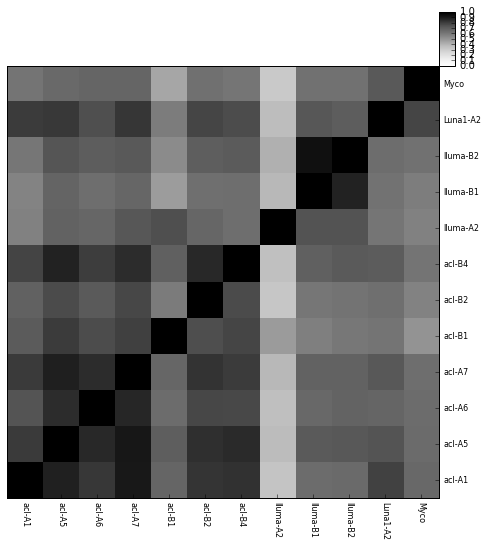

In [9]:
# Define local folder structure for data input and processing.
externalDataDir = 'externalData'
mergedModelDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'

[groupList, metabCompeteDF] = ef.computeMetabCompete(mergedModelDir, summaryStatsDir, 'Tribe', '../externalData/taxonomy.csv')
ef.plotDataFrame(metabCompeteDF, groupList, externalDataDir, summaryStatsDir, 'metabolicCompetition-Tribes.png')

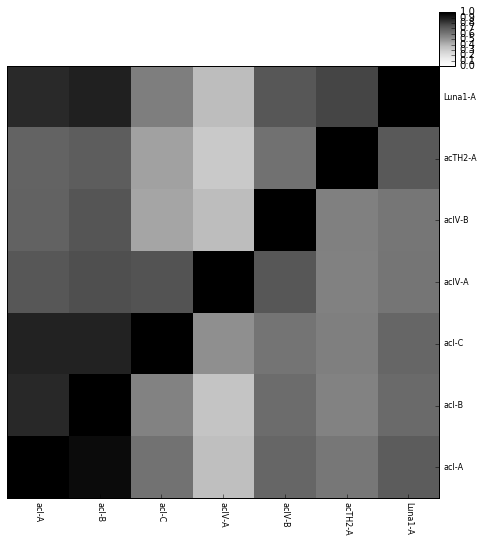

In [10]:
# Define local folder structure for data input and processing.
externalDataDir = 'externalData'
mergedModelDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'

[groupList, metabCompeteDF] = ef.computeMetabCompete(mergedModelDir, summaryStatsDir, 'Clade', '../externalData/taxonomy.csv')
ef.plotDataFrame(metabCompeteDF, groupList, externalDataDir, summaryStatsDir, 'metabolicCompetition-Clades.png')

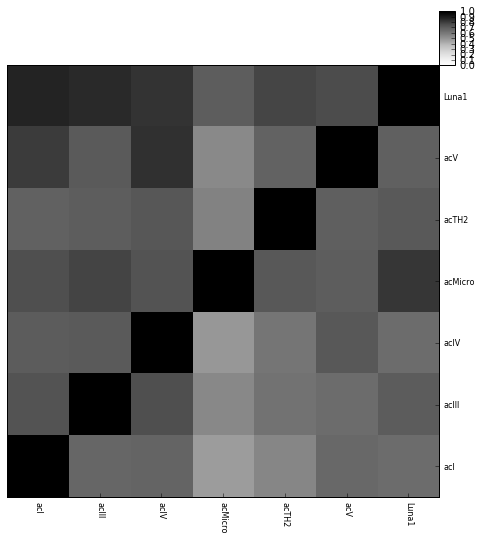

In [11]:
# Define local folder structure for data input and processing.
externalDataDir = 'externalData'
mergedModelDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'

[groupList, metabCompeteDF] = ef.computeMetabCompete(mergedModelDir, summaryStatsDir, 'Lineage', '../externalData/taxonomy.csv')
ef.plotDataFrame(metabCompeteDF, groupList, externalDataDir, summaryStatsDir, 'metabolicCompetition-Lineages.png')

Metabolic competition scores reveal that competition is strongest within (rather than between) lineages. Members of the acI-A clade are particularly competitive. I am not sure what to make of the unusual behavior of the Iluma-A2 tribe.

#### Computation of Metabolic Complementarity

I would also like to compute the metabolic competition scores between all pairs of lineages, clades, or tribes. Clustering the genomes based on these scores could potential cooperative interactions between tribes.

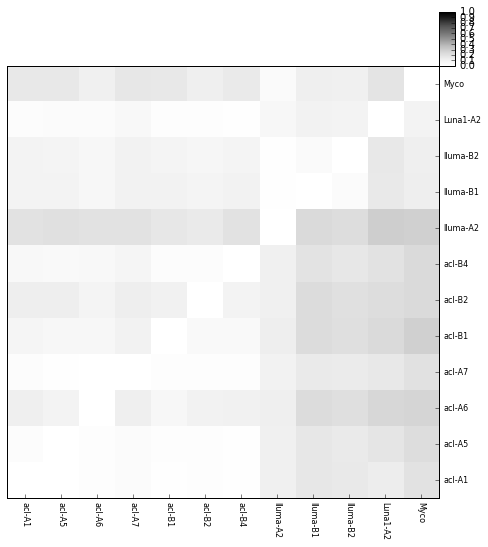

In [12]:
# Define local folder structure for data input and processing.
externalDataDir = 'externalData'
mergedModelDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'

[groupList, metabComplementDF] = ef.computeMetabComplement(mergedModelDir, summaryStatsDir, 'Tribe', '../externalData/taxonomy.csv')
ef.plotDataFrame(metabComplementDF, groupList, externalDataDir, summaryStatsDir, 'metabolicComplementarity-Tribes.png')

There is a "hotspot" of cooperation in the lower right-hand corner. The data suggest that the tribes Iluma-B1, Iluma-B2, Luna1-A2, and Myco can synthesize many of the metabolites essential to acI tribes. The relationship is not reciprocal due to streamlining in the acI lineage. I am not sure what to make of the unusual behavior of the Iluma-A2 tribe.

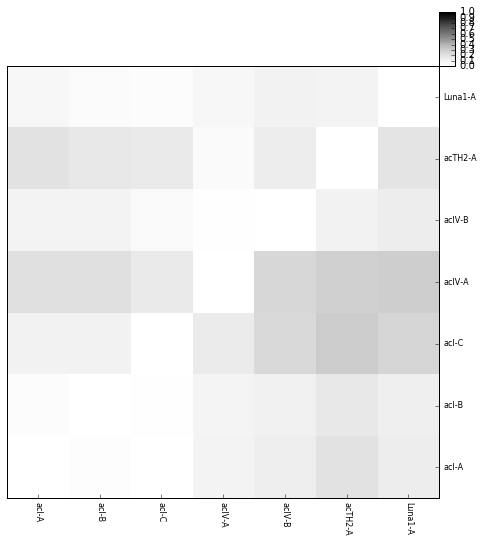

In [15]:
# Define local folder structure for data input and processing.
externalDataDir = 'externalData'
mergedModelDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'

[groupList, metabComplementDF] = ef.computeMetabComplement(mergedModelDir, summaryStatsDir, 'Clade', '../externalData/taxonomy.csv')
ef.plotDataFrame(metabComplementDF, groupList, externalDataDir, summaryStatsDir, 'metabolicComplementarity-Clades.png')

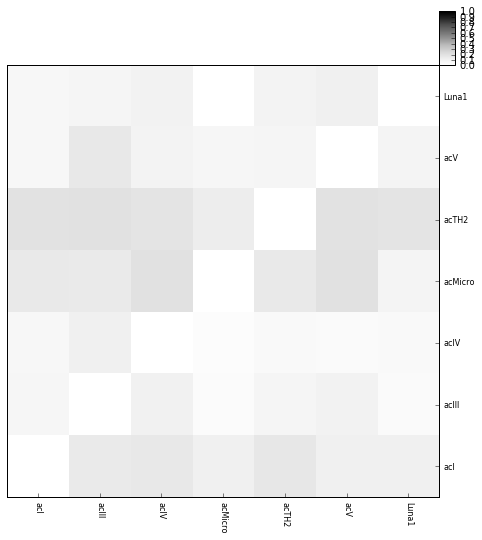

In [16]:
# Define local folder structure for data input and processing.
externalDataDir = 'externalData'
mergedModelDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'

[groupList, metabComplementDF] = ef.computeMetabComplement(mergedModelDir, summaryStatsDir, 'Lineage', '../externalData/taxonomy.csv')
ef.plotDataFrame(metabComplementDF, groupList, externalDataDir, summaryStatsDir, 'metabolicComplementarity-Lineages.png')